# **Introduction**

Road Design Leading to Car Accident

When it comes to car accident, you may think that it is due to bad weather, careless drivers, road condition and so on. In this project, we will mainly focus on road design and how it may lead to car accident. We can certainly take some actions such as alert, road sign to reduce effects of bad weather, careless drivers and road condition; but it seems to be highly uncontrollable considering its unpredicable nature and human errors. Therefore, we will focus on how to resolve controllable factor such as road design.

"Precaution is better than cure". We can improve road design in the future through analysing the relationship between car accident data and current road design. Furthermore, we can also implement road signs or other tools at those places of high possiblity leading to card accident.Therefore, we aim to present this report to local government how to improve road design in order to lower possiblity of car accident.


# **Data description**

We use the data given in our week 1 course -- Collisions excel (data sample set).
The data comes from "Collisions--All Years" which ia owned by SDOT Traffic Management Division and recorded by Traffic Records Group.
This includes all types of collisions and timeframe is from 2004 to present.

In this part, we will discuss how to process data from "Collisions" and analyse the relationship between road design and car accident. Although the road design is complexed and cannot be described easily in the reality, we will try to simplify this by taking some attributes in the Collision excel given for analysis.  


# **Methodology**

The data related to road design are set as independent variables and those related to car accident are then dependent variables. 
There are many attirbutes in the Collisions excel. To make things simple, we try to find out use 3 different terms which can be presented in terms of road design (independent variables). They are "Type of Vehicle", "Type_of_Junction", "Type_of_Collision". We then use SEVERITYCODE in the excel as dependent variables.

We try to figure out the most combination of "Type of Vehicle", "Type_of_Junction", "Type_of_Collision" which lead to car accident. Then we can pass to related parties and suggest how to improve road design.

THe process is shown as below:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


As we can see too many attributes, we pick below columns to present "Type of Vehicle", "Type_of_Junction", "Type_of_Collision" (independent variables).
1. "SDOT_COLCODE" - Type of Vehicle
2. "ADDRTYPE" - Type_of_Junction
3. "COLLISIONTYPE" - Type_of_Collision


In [4]:
sel_columns=['SDOT_COLCODE', 'ADDRTYPE', 'COLLISIONTYPE','SEVERITYCODE']
df_RoadDesign=df[sel_columns]

df_RoadDesign

,SDOT_COLCODE,ADDRTYPE,COLLISIONTYPE,SEVERITYCODE
0,11,Intersection,Angles,2
1,16,Block,Sideswipe,1
2,14,Block,Parked Car,1
3,11,Block,Other,1
4,11,Intersection,Angles,2
...,...,...,...,...
194668,11,Block,Head On,2
194669,14,Block,Rear Ended,1
194670,11,Intersection,Left Turn,2
194671,51,Intersection,Cycles,2


In [5]:
for i in sel_columns:
    print (df_RoadDesign[i].value_counts())

11    85209
14    54299
16     9928
0      9787
28     8856
24     6518
13     5852
26     4741
18     3104
15     1604
12     1440
51     1312
29      479
21      181
56      180
27      166
54      139
23      124
48      107
31      104
25      102
34       93
64       75
69       69
33       53
55       50
66       23
22       17
32       12
53        9
44        8
61        7
35        6
58        5
68        4
36        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64
Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64
Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


As we can see that there are too many options for each attribute, therefore we try to classify those options to simplfy the investigation.

1. Type of vehicle (SDOT_COLCODE)  
  From the attached picture, we can see that numbers between 10 and 29 belongs to "Motor vehicle in operation"; numbers between 30 and 49 belongs to "Driveless motor vehicle" and numbers over 50 belongs to Pedalcyclist in Traffic.  
   Then we can classify type of vehicle by separating SDOT_COLCODE into 3 different number sections.

2. Type of Junction (ADDRTYPE)  
As there are 3 options only, we do not perform any additional work.  
(i.e. Block, Intersection, Alley)

3. Type of collision (COLLISIONTYPE)  
We perform below transformation from COLLISIONTYPE into Type_of_collision to simplify our work.  
'Parked Car', 'Pedestrian' -> Single car  
'Angles', 'Left Turn', 'Right Turn' -> Turning  
'Rear Ended' -> Rear-end  
'Head On' -> Head-on  
'Sideswipe' -> Sideswipe  
'Other' -> Other  

In [6]:
#Type of vehicle (SDOT_COLCODE)
criteria_vehicle = [df_RoadDesign.SDOT_COLCODE.lt(30), df_RoadDesign.SDOT_COLCODE.lt(50), df_RoadDesign.SDOT_COLCODE.ge(50)]
type_vehicle = ['Motor vehicle in operation','Driveless vehicle in vehicle', 'Pedacyclist']
df_RoadDesign['Type_of_Vehicle'] = np.select(criteria_vehicle, type_vehicle)

#Type of Junction (ADDRTYPE)
df_RoadDesign['Type_of_Junction'] = df_RoadDesign['ADDRTYPE']

#Type of collision (COLLISIONTYPE)
df_RoadDesign.loc[(df_RoadDesign.COLLISIONTYPE == 'Parked Car'),'Type_of_Collision'] = 'Single car'
df_RoadDesign.loc[(df_RoadDesign.COLLISIONTYPE == 'Angles'),'Type_of_Collision'] = 'Turning'
df_RoadDesign.loc[(df_RoadDesign.COLLISIONTYPE == 'Rear Ended'),'Type_of_Collision'] = 'Rear-end'
df_RoadDesign.loc[(df_RoadDesign.COLLISIONTYPE == 'Other'),'Type_of_Collision'] = 'Other'
df_RoadDesign.loc[(df_RoadDesign.COLLISIONTYPE == 'Sideswipe'),'Type_of_Collision'] = 'Sideswipe'
df_RoadDesign.loc[(df_RoadDesign.COLLISIONTYPE == 'Left Turn'),'Type_of_Collision'] = 'Turning'
df_RoadDesign.loc[(df_RoadDesign.COLLISIONTYPE == 'Pedestrian'),'Type_of_Collision'] = 'Single car'
df_RoadDesign.loc[(df_RoadDesign.COLLISIONTYPE == 'Cycles'),'Type_of_Collision'] = 'Turning'
df_RoadDesign.loc[(df_RoadDesign.COLLISIONTYPE == 'Right Turn'),'Type_of_Collision'] = 'Turning'
df_RoadDesign.loc[(df_RoadDesign.COLLISIONTYPE == 'Head On'),'Type_of_Collision'] = 'Head-On'
df_RoadDesign.Type_of_Collision = df_RoadDesign.Type_of_Collision.fillna('Other')
df_RoadDesign.Type_of_Vehicle = df_RoadDesign.Type_of_Vehicle.fillna('Other')
                                   
df_RoadDesign

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,SDOT_COLCODE,ADDRTYPE,COLLISIONTYPE,SEVERITYCODE,Type_of_Vehicle,Type_of_Junction,Type_of_Collision
0,11,Intersection,Angles,2,Motor vehicle in operation,Intersection,Turning
1,16,Block,Sideswipe,1,Motor vehicle in operation,Block,Sideswipe
2,14,Block,Parked Car,1,Motor vehicle in operation,Block,Single car
3,11,Block,Other,1,Motor vehicle in operation,Block,Other
4,11,Intersection,Angles,2,Motor vehicle in operation,Intersection,Turning
...,...,...,...,...,...,...,...
194668,11,Block,Head On,2,Motor vehicle in operation,Block,Head-On
194669,14,Block,Rear Ended,1,Motor vehicle in operation,Block,Rear-end
194670,11,Intersection,Left Turn,2,Motor vehicle in operation,Intersection,Turning
194671,51,Intersection,Cycles,2,Pedacyclist,Intersection,Turning


In [7]:
print(df_RoadDesign.Type_of_Vehicle.value_counts())
print(df_RoadDesign.Type_of_Junction.value_counts())
print(df_RoadDesign.Type_of_Collision.value_counts())

Motor vehicle in operation      192407
Pedacyclist                       1875
Driveless vehicle in vehicle       391
Name: Type_of_Vehicle, dtype: int64
Block           126926
Intersection     65070
Alley              751
Name: Type_of_Junction, dtype: int64
Turning       56748
Single car    54595
Rear-end      34090
Other         28607
Sideswipe     18609
Head-On        2024
Name: Type_of_Collision, dtype: int64


After data conversion, we add additional columns for each attribute as abbreviations.  
Then we'll use those abbreviations to form combination for our final analysis.

In [8]:
df_RoadDesign['Abbr_Vehicle']=df_RoadDesign['Type_of_Vehicle'].astype(str).str[0]
df_RoadDesign['Abbr_Junction']=df_RoadDesign['Type_of_Junction'].astype(str).str[0]
df_RoadDesign.loc[(df_RoadDesign.Type_of_Collision == 'Sideswipe'),'Type_of_Collision'] = 'Z(Sideswipe)'
df_RoadDesign['Abbr_Collision']=df_RoadDesign['Type_of_Collision'].astype(str).str[0]
df_RoadDesign['Combination'] = df_RoadDesign['Abbr_Vehicle']+df_RoadDesign['Abbr_Junction']+df_RoadDesign['Abbr_Collision']

df_RoadDesign

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,SDOT_COLCODE,ADDRTYPE,COLLISIONTYPE,SEVERITYCODE,Type_of_Vehicle,Type_of_Junction,Type_of_Collision,Abbr_Vehicle,Abbr_Junction,Abbr_Collision,Combination
0,11,Intersection,Angles,2,Motor vehicle in operation,Intersection,Turning,M,I,T,MIT
1,16,Block,Sideswipe,1,Motor vehicle in operation,Block,Z(Sideswipe),M,B,Z,MBZ
2,14,Block,Parked Car,1,Motor vehicle in operation,Block,Single car,M,B,S,MBS
3,11,Block,Other,1,Motor vehicle in operation,Block,Other,M,B,O,MBO
4,11,Intersection,Angles,2,Motor vehicle in operation,Intersection,Turning,M,I,T,MIT
...,...,...,...,...,...,...,...,...,...,...,...
194668,11,Block,Head On,2,Motor vehicle in operation,Block,Head-On,M,B,H,MBH
194669,14,Block,Rear Ended,1,Motor vehicle in operation,Block,Rear-end,M,B,R,MBR
194670,11,Intersection,Left Turn,2,Motor vehicle in operation,Intersection,Turning,M,I,T,MIT
194671,51,Intersection,Cycles,2,Pedacyclist,Intersection,Turning,P,I,T,PIT


We select top 10 combinations for our analysis.  
We sum severity scores ("SEVERITYCODE") in terms of combination. Then we'll see which combination appears the most.

In [9]:
df_final=df_RoadDesign.groupby('Combination').sum()
df_final= df_final.sort_values('SEVERITYCODE',ascending = False).head(10)
del df_final['SDOT_COLCODE']

df_final

,SEVERITYCODE
Combination,
MIT,63133
MBS,51097
MBR,42413
MBO,28257
MBZ,16560
MBT,14361
MIS,10281
MIO,6615
MIR,5987


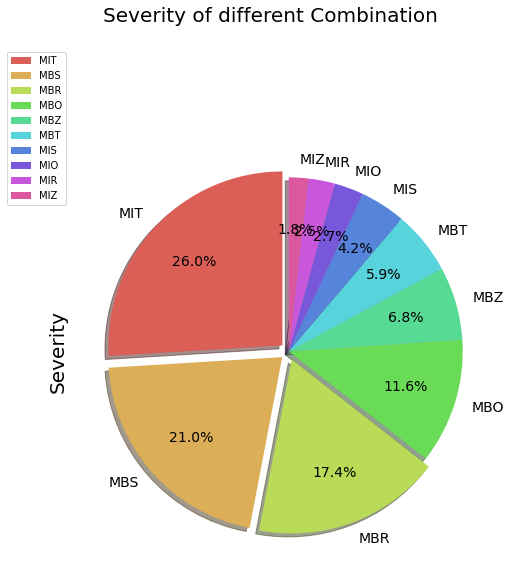

In [10]:
colors_list = sns.color_palette("hls", 10)
explode_list = [0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0]

df_final['SEVERITYCODE'].plot(kind='pie',
                            figsize=(20, 8),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow    
                            pctdistance=0.7, 
                            colors=colors_list,
                            explode=explode_list,
                            textprops={'fontsize': 14}
                            )

plt.suptitle('Severity of different Combination', y=1.1, fontsize =20)
plt.ylabel('Severity',fontsize =20, x=2)

plt.legend(labels=df_final.index, bbox_to_anchor=(0,1.2)) 

plt.show()


# **Results**

From above result, we can conclude followings:
1. All Type_of_Vehicle are 'M's among the top 10 combinations.  
2. Type_of_Junction 'B' contributes over 50% among the top 10 combinations.  
3. No significant category of Type_of_Collision stands out from others.


# **Discussion**

1. Type_of_Vehicle  
Top 10 combinations are all 'M's which means 'Motor vehicle in operation' is the main source leading to car accident.  
Therefore, we can focus enhancement how to alert vehicle drivers of safe driving such as installment of more road signs, advertisment and so on.

2. Type_of_Junction  
'B' (Block) is the main factor among others (intersection and alley) leading to car accident.  
Therefore, we may provide more road signs and focus more on current block design which could easily lead to car accident in the other investigations.  

3. Type_of_Collision
No significant factor which implies car accident could be in any form (e.g. sideswipe, head-on, turning, ....).  
Therefore, we cannot ignore any direction, situation which could lead to car accident.

# **Conclusion**

Though it may not be a perfect solution to the issue, it can be a reference or insipre for the related parties(government).  
From this mini project, we can tell that most car accident happened at the block with moving vehicle.  
The related parties can take this part into consider and make improvement for road design or road user.

### **END**
